In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('greenery_land_usage_data.csv')

In [33]:
df.head()

,idhous21,pop_density,distance_to_center_1,distance_to_center_2,trees_forest_210,trees_park_210,trees_other_210,meadow_parks_210,meadow_recreation_210,meadow_garden_210,...,agri_other_630,residential_630,commercial_630,groceries_630,CCE_630,recreation_use_630,public_services_630,commercial_groceries_630,entropy_6_630,entropy_5_630
0,51,26266.246893,4747.956900,4133.256444,0.000000,0.189109,0.054471,0.040475,0.004117,0.032951,...,0.000494,0.248645,0.131198,0.014656,0.022484,0.320864,0.262152,0.145854,0.823464,0.887191
1,131,812.480663,5943.020154,5176.860831,0.000000,0.000000,0.196621,0.000000,0.000731,0.000000,...,0.535163,0.758206,0.000000,0.013894,0.000000,0.189515,0.038384,0.013894,0.396061,0.440927
2,271,13703.974439,2593.179523,2270.305964,0.040943,0.003402,0.045815,0.005191,0.000008,0.000000,...,0.000000,0.526772,0.029174,0.012220,0.030500,0.229956,0.171378,0.041394,0.692803,0.755680
3,271,13703.974439,2593.179523,2270.305964,0.040943,0.003402,0.045815,0.005191,0.000008,0.000000,...,0.000000,0.526772,0.029174,0.012220,0.030500,0.229956,0.171378,0.041394,0.692803,0.755680
4,272,514.293440,3499.104621,3060.420015,0.000000,0.000000,0.026513,0.000000,0.000290,0.000000,...,0.118837,0.651461,0.017908,0.012920,0.019134,0.175069,0.123508,0.030828,0.584053,0.637190


In [34]:
df.isnull().sum()

idhous21                    0
pop_density                 0
distance_to_center_1        0
distance_to_center_2        0
trees_forest_210            0
trees_park_210              0
trees_other_210             0
meadow_parks_210            0
meadow_recreation_210       0
meadow_garden_210           0
meadow_playground_210       0
meadow_other_210            0
agri_allotments_210         0
agri_other_210              0
residential_210             5
commercial_210              5
groceries_210               5
CCE_210                     5
recreation_use_210          5
public_services_210         5
commercial_groceries_210    5
entropy_6_210               5
entropy_5_210               5
trees_forest_630            0
trees_park_630              0
trees_other_630             0
meadow_parks_630            0
meadow_recreation_630       0
meadow_garden_630           0
meadow_playground_630       0
meadow_other_630            0
agri_allotments_630         0
agri_other_630              0
residentia

Drop null values

In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

idhous21                    0
pop_density                 0
distance_to_center_1        0
distance_to_center_2        0
trees_forest_210            0
trees_park_210              0
trees_other_210             0
meadow_parks_210            0
meadow_recreation_210       0
meadow_garden_210           0
meadow_playground_210       0
meadow_other_210            0
agri_allotments_210         0
agri_other_210              0
residential_210             0
commercial_210              0
groceries_210               0
CCE_210                     0
recreation_use_210          0
public_services_210         0
commercial_groceries_210    0
entropy_6_210               0
entropy_5_210               0
trees_forest_630            0
trees_park_630              0
trees_other_630             0
meadow_parks_630            0
meadow_recreation_630       0
meadow_garden_630           0
meadow_playground_630       0
meadow_other_630            0
agri_allotments_630         0
agri_other_630              0
residentia

In [37]:
df.duplicated().sum()  # Count duplicates
df.drop_duplicates(inplace=True)  # Remove duplicates

Population density correlation with the amount of green space in different urban areas?

In [40]:
df['total_meadows'] = df[['meadow_parks_630', 'meadow_recreation_630', 'meadow_garden_630', 'meadow_playground_630', 'meadow_other_630',
                          'meadow_parks_210', 'meadow_recreation_210', 'meadow_garden_210', 'meadow_playground_210', 'meadow_other_210']].sum(axis=1)

In [41]:
df.head()

,idhous21,pop_density,distance_to_center_1,distance_to_center_2,trees_forest_210,trees_park_210,trees_other_210,meadow_parks_210,meadow_recreation_210,meadow_garden_210,...,residential_630,commercial_630,groceries_630,CCE_630,recreation_use_630,public_services_630,commercial_groceries_630,entropy_6_630,entropy_5_630,total_meadows
0,51,26266.246893,4747.956900,4133.256444,0.000000,0.189109,0.054471,0.040475,0.004117,0.032951,...,0.248645,0.131198,0.014656,0.022484,0.320864,0.262152,0.145854,0.823464,0.887191,0.328500
1,131,812.480663,5943.020154,5176.860831,0.000000,0.000000,0.196621,0.000000,0.000731,0.000000,...,0.758206,0.000000,0.013894,0.000000,0.189515,0.038384,0.013894,0.396061,0.440927,0.363593
2,271,13703.974439,2593.179523,2270.305964,0.040943,0.003402,0.045815,0.005191,0.000008,0.000000,...,0.526772,0.029174,0.012220,0.030500,0.229956,0.171378,0.041394,0.692803,0.755680,0.296858
4,272,514.293440,3499.104621,3060.420015,0.000000,0.000000,0.026513,0.000000,0.000290,0.000000,...,0.651461,0.017908,0.012920,0.019134,0.175069,0.123508,0.030828,0.584053,0.637190,0.610420
6,341,13703.974439,2166.416716,1896.645437,0.000000,0.000118,0.020716,0.002108,0.000000,0.000340,...,0.439137,0.092469,0.068928,0.038777,0.198706,0.161982,0.161397,0.841560,0.868455,0.156211


In [42]:
df['total_trees'] = df[['trees_forest_210', 'trees_park_210', 'trees_other_210', 'trees_forest_630', 'trees_park_630', 'trees_other_630']].sum(axis=1)

In [54]:
df['residential']=df[['residential_210','residential_630']].sum(axis=1)

In [55]:
df.drop(columns=['residential_210','residential_630'],inplace = True)

In [49]:
columns_to_drop = ['meadow_parks_210', 'meadow_recreation_210', 'meadow_garden_210',  'meadow_playground_210', 'meadow_other_210',
                   'trees_forest_210', 'trees_park_210', 'trees_other_210','meadow_parks_630','meadow_recreation_630','meadow_garden_630',
                   'meadow_playground_630','meadow_other_630','trees_forest_630', 'trees_park_630', 'trees_other_630']

In [50]:
df.drop(columns = columns_to_drop,inplace = True)

In [51]:
df.head()

,idhous21,pop_density,distance_to_center_1,distance_to_center_2,agri_allotments_210,agri_other_210,residential_210,commercial_210,groceries_210,CCE_210,...,commercial_630,groceries_630,CCE_630,recreation_use_630,public_services_630,commercial_groceries_630,entropy_6_630,entropy_5_630,total_meadows,total_trees
0,51,26266.246893,4747.956900,4133.256444,0.0,0.000249,0.202064,0.090479,0.009778,0.009778,...,0.131198,0.014656,0.022484,0.320864,0.262152,0.145854,0.823464,0.887191,0.328500,0.368076
1,131,812.480663,5943.020154,5176.860831,0.0,0.268035,0.745709,0.000000,0.000000,0.000000,...,0.000000,0.013894,0.000000,0.189515,0.038384,0.013894,0.396061,0.440927,0.363593,0.458795
2,271,13703.974439,2593.179523,2270.305964,0.0,0.000000,0.737413,0.031924,0.003629,0.000000,...,0.029174,0.012220,0.030500,0.229956,0.171378,0.041394,0.692803,0.755680,0.296858,0.186302
4,272,514.293440,3499.104621,3060.420015,0.0,0.093103,0.823743,0.018825,0.004575,0.000000,...,0.017908,0.012920,0.019134,0.175069,0.123508,0.030828,0.584053,0.637190,0.610420,0.061851
6,341,13703.974439,2166.416716,1896.645437,0.0,0.000000,0.497359,0.152018,0.013871,0.031444,...,0.092469,0.068928,0.038777,0.198706,0.161982,0.161397,0.841560,0.868455,0.156211,0.087469


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4651 entries, 0 to 6916
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idhous21                  4651 non-null   int64  
 1   pop_density               4651 non-null   float64
 2   distance_to_center_1      4651 non-null   float64
 3   distance_to_center_2      4651 non-null   float64
 4   agri_allotments_210       4651 non-null   float64
 5   agri_other_210            4651 non-null   float64
 6   commercial_210            4651 non-null   float64
 7   groceries_210             4651 non-null   float64
 8   CCE_210                   4651 non-null   float64
 9   recreation_use_210        4651 non-null   float64
 10  public_services_210       4651 non-null   float64
 11  commercial_groceries_210  4651 non-null   float64
 12  entropy_6_210             4651 non-null   float64
 13  entropy_5_210             4651 non-null   float64
 14  agri_allotmen

In [63]:
correlation_matrix = df[['pop_density', 'total_trees']].corr().iloc[0,1]
correlation_matrix

0.005530644035638808

In [64]:
correlation_matrix = df[['pop_density', 'total_meadows']].corr().iloc[0,1]
correlation_matrix

-0.504233021787093

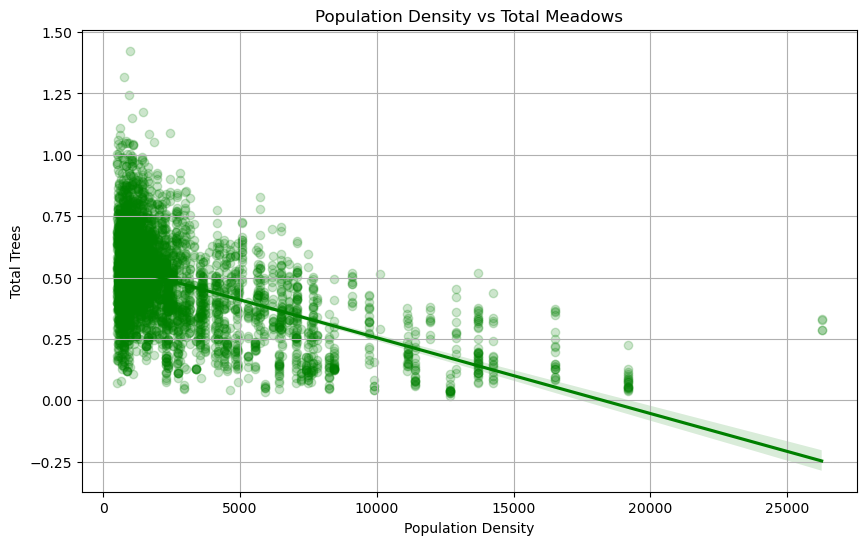

In [186]:
#Population Density vs Total Meadows
plt.figure(figsize=(10, 6))
sns.regplot(x='pop_density', y='total_meadows', data=df, scatter_kws={'alpha':0.2},color = 'green')
plt.title('Population Density vs Total Meadows')
plt.xlabel('Population Density')
plt.ylabel('Total Trees')
plt.grid(True)
plt.show()


In [80]:
corr = df[['residential','total_meadows']].corr()
corr

,residential,total_meadows
residential,1.00000,0.35425
total_meadows,0.35425,1.00000


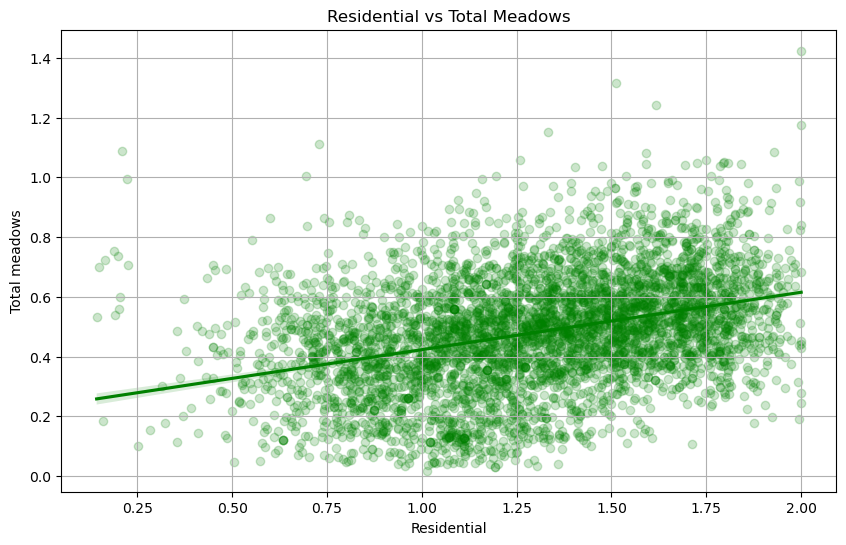

In [187]:
#Residential vs Total Meadows
plt.figure(figsize=(10, 6))
sns.regplot(x='residential', y='total_meadows', data=df, scatter_kws={'alpha':0.2},color = 'green')
plt.title('Residential vs Total Meadows')
plt.xlabel('Residential')
plt.ylabel('Total meadows')
plt.grid(True)
plt.show()

In [73]:
df['avg_distance_to_center'] = df[['distance_to_center_1', 'distance_to_center_2']].mean(axis=1)


In [74]:
df.drop(columns=['distance_to_center_1', 'distance_to_center_2']).mean(axis=1)

0         1183.220439
1          250.335770
2          631.218729
4          156.571909
6          618.545757
            ...      
6911     26628.748706
6913     27080.480512
6914    390231.369003
6915    617395.523997
6916     16474.403788
Length: 4651, dtype: float64

In [75]:
df.head()

,idhous21,pop_density,distance_to_center_1,distance_to_center_2,agri_allotments_210,agri_other_210,commercial_210,groceries_210,CCE_210,recreation_use_210,...,CCE_630,recreation_use_630,public_services_630,commercial_groceries_630,entropy_6_630,entropy_5_630,total_meadows,total_trees,residential,avg_distance_to_center
0,51,26266.246893,4747.956900,4133.256444,0.0,0.000249,0.090479,0.009778,0.009778,0.643234,...,0.022484,0.320864,0.262152,0.145854,0.823464,0.887191,0.328500,0.368076,0.450710,4440.606672
1,131,812.480663,5943.020154,5176.860831,0.0,0.268035,0.000000,0.000000,0.000000,0.194457,...,0.000000,0.189515,0.038384,0.013894,0.396061,0.440927,0.363593,0.458795,1.503915,5559.940493
2,271,13703.974439,2593.179523,2270.305964,0.0,0.000000,0.031924,0.003629,0.000000,0.058489,...,0.030500,0.229956,0.171378,0.041394,0.692803,0.755680,0.296858,0.186302,1.264185,2431.742743
4,272,514.293440,3499.104621,3060.420015,0.0,0.093103,0.018825,0.004575,0.000000,0.002934,...,0.019134,0.175069,0.123508,0.030828,0.584053,0.637190,0.610420,0.061851,1.475204,3279.762318
6,341,13703.974439,2166.416716,1896.645437,0.0,0.000000,0.152018,0.013871,0.031444,0.012044,...,0.038777,0.198706,0.161982,0.161397,0.841560,0.868455,0.156211,0.087469,0.936496,2031.531077


Creating a pair plot

C:\Users\EK2394\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EK2394\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EK2394\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EK2394\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

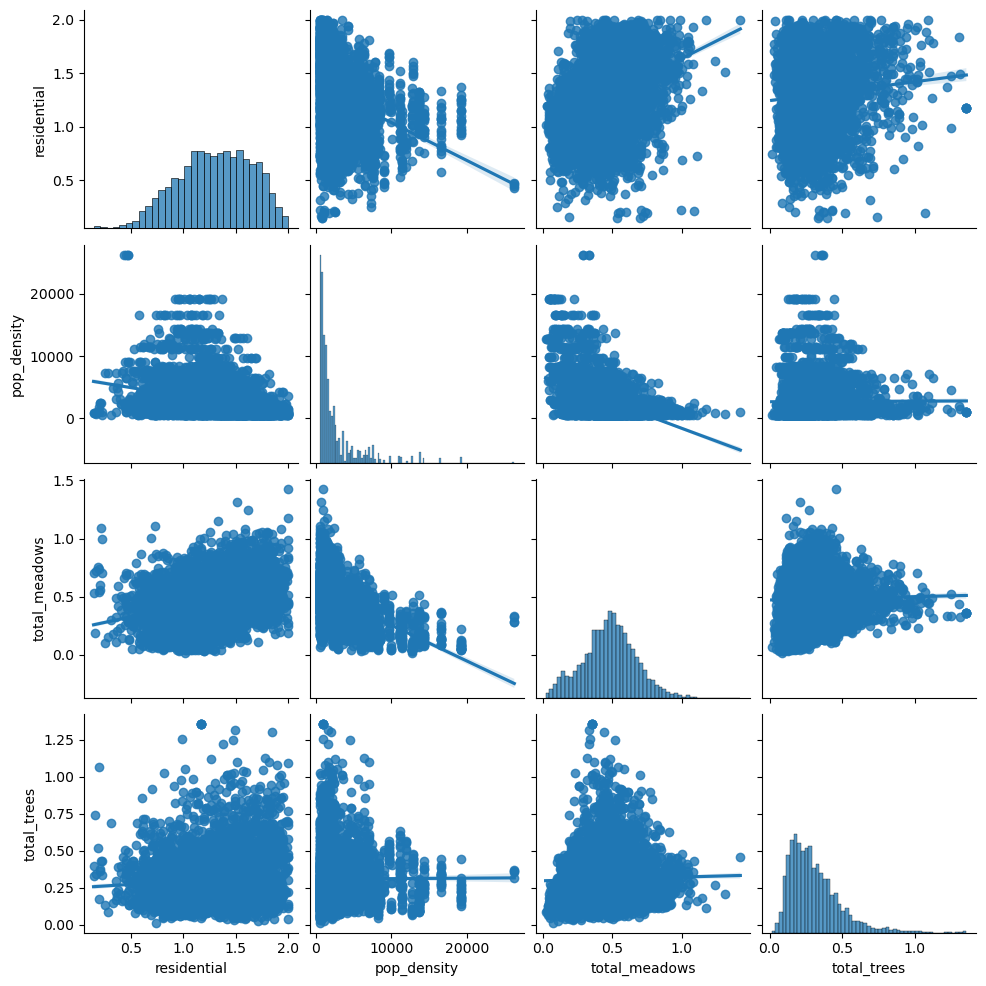

In [98]:
# Select the columns for the pair plot
columns_to_plot = ['residential', 'pop_density', 'total_meadows', 'total_trees']
# Create the pair plot
sns.pairplot(df[columns_to_plot],kind='reg')
# Show the plot
plt.show()


Is there is significant difference in the amount of green space available for areas further from urban centers compared to those closer?

In [101]:
df.head()

,idhous21,pop_density,distance_to_center_1,distance_to_center_2,agri_allotments_210,agri_other_210,commercial_210,groceries_210,CCE_210,recreation_use_210,...,recreation_use_630,public_services_630,commercial_groceries_630,entropy_6_630,entropy_5_630,total_meadows,total_trees,residential,avg_distance_to_center,total_green_space
0,51,26266.246893,4747.956900,4133.256444,0.0,0.000249,0.090479,0.009778,0.009778,0.643234,...,0.320864,0.262152,0.145854,0.823464,0.887191,0.328500,0.368076,0.450710,4440.606672,0.696576
1,131,812.480663,5943.020154,5176.860831,0.0,0.268035,0.000000,0.000000,0.000000,0.194457,...,0.189515,0.038384,0.013894,0.396061,0.440927,0.363593,0.458795,1.503915,5559.940493,0.822388
2,271,13703.974439,2593.179523,2270.305964,0.0,0.000000,0.031924,0.003629,0.000000,0.058489,...,0.229956,0.171378,0.041394,0.692803,0.755680,0.296858,0.186302,1.264185,2431.742743,0.483160
4,272,514.293440,3499.104621,3060.420015,0.0,0.093103,0.018825,0.004575,0.000000,0.002934,...,0.175069,0.123508,0.030828,0.584053,0.637190,0.610420,0.061851,1.475204,3279.762318,0.672271
6,341,13703.974439,2166.416716,1896.645437,0.0,0.000000,0.152018,0.013871,0.031444,0.012044,...,0.198706,0.161982,0.161397,0.841560,0.868455,0.156211,0.087469,0.936496,2031.531077,0.243680


In [105]:
df['total_green'] = df['total_meadows'] + df['total_trees']

In [109]:
total_meadows = df['total_meadows'].sum()
total_trees = df['total_trees'].sum()
total_green = total_meadows + total_trees

percentage_meadows = (total_meadows / total_green) * 100
percentage_trees = (total_trees / total_green) * 100


In [110]:
percentage_trees

39.16148624242161

In [111]:
percentage_meadows

60.83851375757838

In [129]:
corrr = df[['total_meadows','total_trees']].corr().iloc[0,1]
corrr

0.026956856588718135

Finding Correlation between meadows and trees

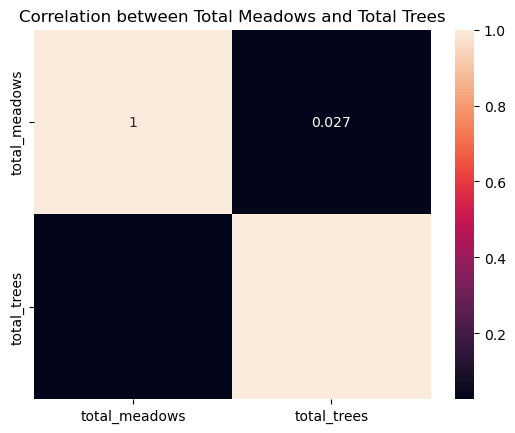

In [185]:
corrr = df[['total_meadows','total_trees']].corr()
sns.heatmap(corrr, annot=True)
plt.title('Correlation between Total Meadows and Total Trees')
plt.show()

In [121]:
df['distance_category'] = df['avg_distance_to_center'].apply(lambda x:'close' if x<=2500 else 'far')

In [122]:
average_green_space = df.groupby('distance_category')['total_green_space'].mean().reset_index()
print(average_green_space)


  distance_category  total_green_space
0             close           0.771082
1               far           0.815691


In [124]:
from scipy import stats

# Extract data for the two groups
close_green_space = df[df['distance_category'] == 'close']['total_green_space']
far_green_space = df[df['distance_category'] == 'far']['total_green_space']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(close_green_space, far_green_space)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -5.728470326842173, P-value: 1.0772634141928515e-08


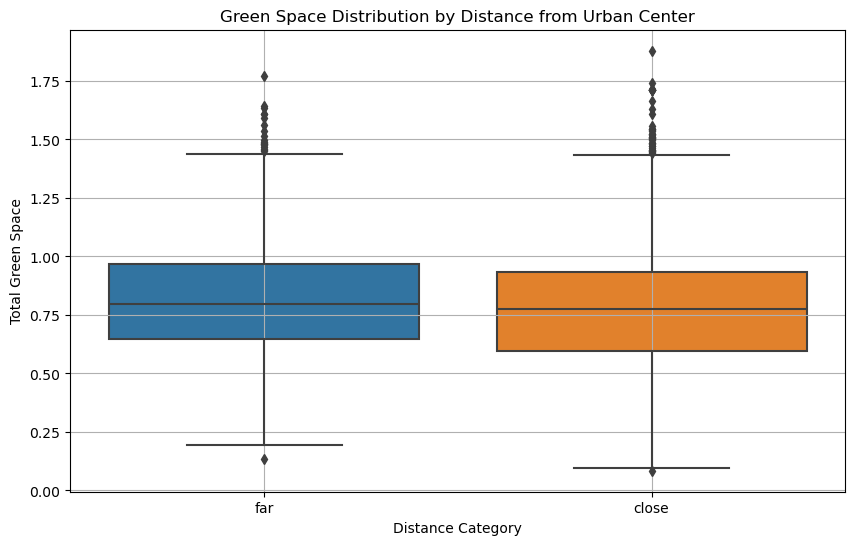

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='distance_category', y='total_green_space', data=df)
plt.title('Green Space Distribution by Distance from Urban Center')
plt.xlabel('Distance Category')
plt.ylabel('Total Green Space')
plt.grid(True)
plt.show()


In [133]:
#Recreation

In [180]:
df['recreation'] = df['recreation_use_630'] + df['recreation_use_210']
total = df['recreation'].sum()
df['recreation_normalised'] = (df['recreation']/total ) * 100
df['recreation_normalised']

0       0.095924
1       0.038204
2       0.028699
4       0.017711
6       0.020969
          ...   
6911    0.007179
6913    0.022845
6914    0.033940
6915    0.049070
6916    0.051596
Name: recreation_normalised, Length: 4651, dtype: float64

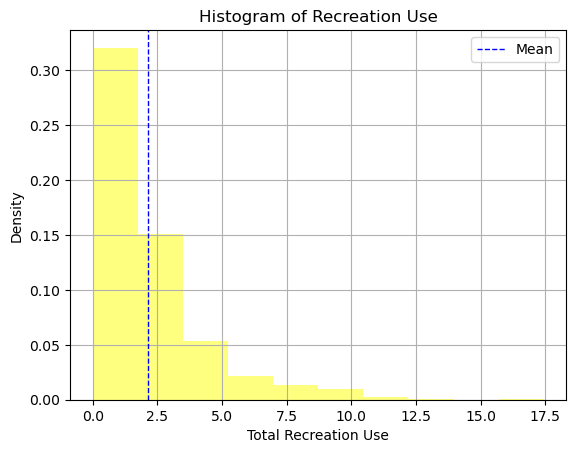

In [179]:
plt.hist(df['recreation_normalised'], bins=10, alpha=0.5, color='yellow', density=True)  # Set density=True for a normalized histogram
plt.grid()
plt.title('Histogram of Recreation Use')
plt.xlabel('Total Recreation Use')
plt.ylabel('Density')
plt.axvline(df['recreation_normalised'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.show()

In [184]:
df.head()

,idhous21,pop_density,distance_to_center_1,distance_to_center_2,agri_allotments_210,agri_other_210,commercial_210,groceries_210,CCE_210,recreation_use_210,...,entropy_5_630,total_meadows,total_trees,residential,avg_distance_to_center,total_green_space,total_green,distance_category,recreation,recreation_normalised
0,51,26266.246893,4747.956900,4133.256444,0.0,0.000249,0.090479,0.009778,0.009778,0.643234,...,0.887191,0.328500,0.368076,0.450710,4440.606672,0.696576,0.696576,far,0.964098,0.095924
1,131,812.480663,5943.020154,5176.860831,0.0,0.268035,0.000000,0.000000,0.000000,0.194457,...,0.440927,0.363593,0.458795,1.503915,5559.940493,0.822388,0.822388,far,0.383972,0.038204
2,271,13703.974439,2593.179523,2270.305964,0.0,0.000000,0.031924,0.003629,0.000000,0.058489,...,0.755680,0.296858,0.186302,1.264185,2431.742743,0.483160,0.483160,close,0.288445,0.028699
4,272,514.293440,3499.104621,3060.420015,0.0,0.093103,0.018825,0.004575,0.000000,0.002934,...,0.637190,0.610420,0.061851,1.475204,3279.762318,0.672271,0.672271,far,0.178003,0.017711
6,341,13703.974439,2166.416716,1896.645437,0.0,0.000000,0.152018,0.013871,0.031444,0.012044,...,0.868455,0.156211,0.087469,0.936496,2031.531077,0.243680,0.243680,close,0.210750,0.020969


In [188]:
df.columns

Index(['idhous21', 'pop_density', 'distance_to_center_1',
       'distance_to_center_2', 'agri_allotments_210', 'agri_other_210',
       'commercial_210', 'groceries_210', 'CCE_210', 'recreation_use_210',
       'public_services_210', 'commercial_groceries_210', 'entropy_6_210',
       'entropy_5_210', 'agri_allotments_630', 'agri_other_630',
       'commercial_630', 'groceries_630', 'CCE_630', 'recreation_use_630',
       'public_services_630', 'commercial_groceries_630', 'entropy_6_630',
       'entropy_5_630', 'total_meadows', 'total_trees', 'residential',
       'avg_distance_to_center', 'total_green_space', 'total_green',
       'distance_category', 'recreation', 'recreation_normalised'],
      dtype='object')

In [197]:
df.columns[df.columns.str.startswith('e')]

Index(['entropy_6_210', 'entropy_5_210', 'entropy_6_630', 'entropy_5_630'], dtype='object')

In [198]:
df.columns.str